# coursera capstons

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Introduction: Car collision problem
Can we predict the severity of a car accident based on the data given?

Audience:

Drivers, pedestrians, bicyclers in Seattle.
Seattle Department of Transportation.
For people who live in Seattle, the analysis can help to lower the possibility of car accidents. For example, be more careful driving in some places, do not drink or drug when driving...

The results from the analysis can help the government transportation department to predict the possibility of a car accident. And so, lower speed limit or warning signs can be added to places with high car accident severity. Four-way stop signs can be placed in intersections with low car accident severity to decrease the cost.

## Data
Data: Collisions - All Years in Seattle

Dataset: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv.

Metadata: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

The severity of the car accident can be derived from the severity code column.

Collision types, date, junction types, whether the collision is due to inattention, whether the driver was under drug or alcohol, weather conditions, road conditions, light conditions, whether or not the pedestrian right of way was not granted, and speeding are the attributes used in the project to determine the severity of car collisions.

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [4]:
!wget Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-25 18:41:06--  http://data-collisions.csv/
Resolving data-collisions.csv (data-collisions.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘data-collisions.csv’
--2020-08-25 18:41:06--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv.1’

Data-Collisions.csv 100%[===================>]  70.49M  11.2MB/s    in 6.6s    

2020-08-25 18:41:14 (10.7 MB/s) - ‘Data-Collisions.csv.1’ saved [73917638/73917638]

FINISHED --2020-08-25 18:41:14--
Total wall clock time: 7.3s
Downloaded: 1 files, 70M in 6.6s (10.7 MB/s)


In [5]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Preproces and clean the data

In [6]:
df['SEVERITYCODE'].value_counts(normalize=True)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

In [7]:
df.drop(['X','Y','OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',\
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',\
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',\
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',\
       'SDOT_COLCODE', 'SDOT_COLDESC',\
       'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC',\
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],axis=1,inplace=True)
df.head()

,SEVERITYCODE,COLLISIONTYPE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,Angles,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN
1,1,Sideswipe,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN
2,1,Parked Car,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN
3,1,Other,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN
4,2,Angles,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN


In [8]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['dayofweek'] = df['INCDTTM'].dt.dayofweek 
df['dayofweek'].unique()

array([2, 3, 4, 5, 1, 0, 6])

In [9]:
df['INATTENTIONIND'] = df['INATTENTIONIND'].fillna(0)
df['INATTENTIONIND'].replace(to_replace=['Y'], value=[1],inplace=True)
df['INATTENTIONIND']

0         0
1         0
2         0
3         0
4         0
         ..
194668    0
194669    1
194670    0
194671    0
194672    0
Name: INATTENTIONIND, Length: 194673, dtype: int64

In [10]:
print(df['UNDERINFL'].unique())
df['UNDERINFL'] = df['UNDERINFL'].fillna(0)
df['UNDERINFL'].replace(to_replace=['N','Y','0','1'],value=[0,1,0,1],inplace=True)
df['UNDERINFL'].unique()

['N' '0' nan '1' 'Y']


array([0, 1])

In [11]:
print(df['PEDROWNOTGRNT'].unique())
df['PEDROWNOTGRNT'] = df['PEDROWNOTGRNT'].fillna(0)
df['PEDROWNOTGRNT'].replace(to_replace=['Y'],value=[1],inplace=True)
df['PEDROWNOTGRNT'].unique()

[nan 'Y']


array([0, 1])

In [12]:
print(df['SPEEDING'].unique())
df['SPEEDING'] = df['SPEEDING'].fillna(0)
df['SPEEDING'].replace(to_replace=['Y'],value=[1],inplace=True)
df['SPEEDING'].unique()

[nan 'Y']


array([0, 1])

In [13]:
df.dropna()
df.drop(['INCDTTM'],axis=1,inplace=True)
df.head()

,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,dayofweek
0,2,Angles,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,2
1,1,Sideswipe,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,2
2,1,Parked Car,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,3
3,1,Other,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,4
4,2,Angles,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,2


In [14]:
#one hot coding ['JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE']
df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)
pd.get_dummies(df['COLLISIONTYPE']).head()

,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [15]:
Feature = df[['INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['JUNCTIONTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['LIGHTCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
Feature.head()

,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,dayofweek,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),...,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,0,0,0,0,2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,3,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,4,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
X = Feature
X[0:5]

,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,dayofweek,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),...,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,0,0,0,0,2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,3,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,4,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [18]:
#normalizing data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.42518348, -0.2217116 , -0.1567239 , -0.22440165, -0.48852801,
        -0.10437651,  1.44892892, -0.2408193 , -0.36412936, -0.92535062,
        -0.02921369, -0.00679952, -0.01696304, -1.15340914, -0.05414257,
        -0.06551471,  2.45445634, -0.00506801, -0.45298634, -0.011333  ,
        -0.02409974, -0.06841713, -0.28988624, -1.33213439, -0.07905204,
        -0.01813462, -0.02604842, -0.01963186, -0.07200071, -0.02431221,
        -0.28975087,  1.76085874, -0.08920831, -0.07872239, -0.576075  ,
        -0.00751719, -0.1141037 ,  0.82233559, -0.17682024, -0.03476509,
        -0.27267986,  2.14811072, -0.16915004, -0.10249953, -0.27517219,
        -0.37234172, -0.57196238, -0.18744809, -0.46074827, -0.12417149,
        -0.32510694],
       [-0.42518348, -0.2217116 , -0.1567239 , -0.22440165, -0.48852801,
        -0.10437651, -0.69016498, -0.2408193 , -0.36412936,  1.08067145,
        -0.02921369, -0.00679952, -0.01696304, -1.15340914, -0.05414257,
        -0.06551471, -0.40742

# Methodology
In the project, the collision data is provided by the coursera capston project as an example. 

Firstly, pre-process and clean the data. Irrelevant attributes in the table are dropped, one hot coding is used to convert categorical variables to binary variables. Nan in the columns ['INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING'] are converted to 0. 

Secondly, classification methods including K nearest neighbour (KNN) and decision tree are chosen to build and train the model because there're a lot of attributes in this collision datasets and so, comparing and observe the trend of individual attributes will be tedious and ambiguous. 0.2% and 2% of the data are chosen randomly as test and training data to run the notebook faster.

Finally, jaccard_similarity_score and f1_score are calculated to evaluate the accuracy of the models.Jaccard similarity score is a measurement of the similarity or overlapping of two datasets. It range from 0% to 100% and 100% means two datasets are identical. F1 score is also an accuracy test which compare the true positive and false positive in the predict dataset. When F1-score equals 1, two datasets are identical.

# KNN

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.002,train_size=0.02, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3893, 51) (3893,)
Test set: (390, 51) (390,)


mean [0.67179487 0.70769231 0.71538462 0.72820513 0.69230769 0.73846154
 0.7025641  0.74615385 0.73589744 0.75128205 0.73076923 0.75128205
 0.73333333 0.74871795 0.73076923 0.76410256 0.74871795 0.75897436
 0.75128205 0.76153846 0.75897436 0.76666667 0.76923077 0.76666667
 0.77179487 0.77179487 0.78205128 0.77435897 0.77692308 0.78461538
 0.78205128 0.78205128 0.78205128 0.78461538 0.77948718 0.77179487
 0.78205128 0.77948718 0.77179487 0.78717949 0.78717949 0.77692308
 0.78205128 0.77948718 0.77948718 0.78205128 0.77435897 0.77692308
 0.76666667] 
std [0.02377709 0.02303085 0.02284897 0.02252761 0.02337091 0.02225356
 0.02314767 0.02203775 0.02232352 0.02188884 0.02246054 0.02188884
 0.02239251 0.0219638  0.02246054 0.02149835 0.0219638  0.02165773
 0.02188884 0.02157858 0.02165773 0.02141704 0.02133462 0.02141704
 0.0212511  0.0212511  0.02090559 0.02116644 0.02108065 0.0208163
 0.02090559 0.02090559 0.02090559 0.0208163  0.02099371 0.0212511
 0.02090559 0.02099371 0.0212511  0.02072

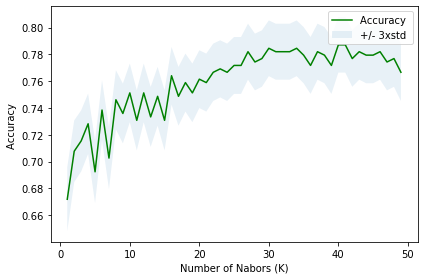

In [51]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print('mean',mean_acc,'\nstd',std_acc)
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [52]:
list(mean_acc).index(mean_acc.max())
#mean_acc.max()

39

In [62]:
def KNN(X_test):
    k = 39  #39 is best k
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    return yhat

# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
!conda install -c conda-forge pydotplus -y
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py37hc8dfbb8_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyhd1c1de3_3


In [86]:
def decision(X_test):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
    drugTree.fit(X_train,y_train)
    predTree = drugTree.predict(X_test)
    dot_data = StringIO()
    filename = "Data-Collisions.png"
    featureNames = Feature.columns[0:51]
    targetNames = df["SEVERITYCODE"].unique().tolist()
    out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y)),filled=True,  special_characters=True,rotate=False)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img,interpolation='nearest')
    return predTree

# Evaluation

In [93]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
#from sklearn.metrics import log_loss

In [91]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.002,train_size=0.02, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3893, 51) (3893,)
Test set: (390, 51) (390,)


In [95]:
y

array([2, 1, 1, ..., 2, 2, 1])

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


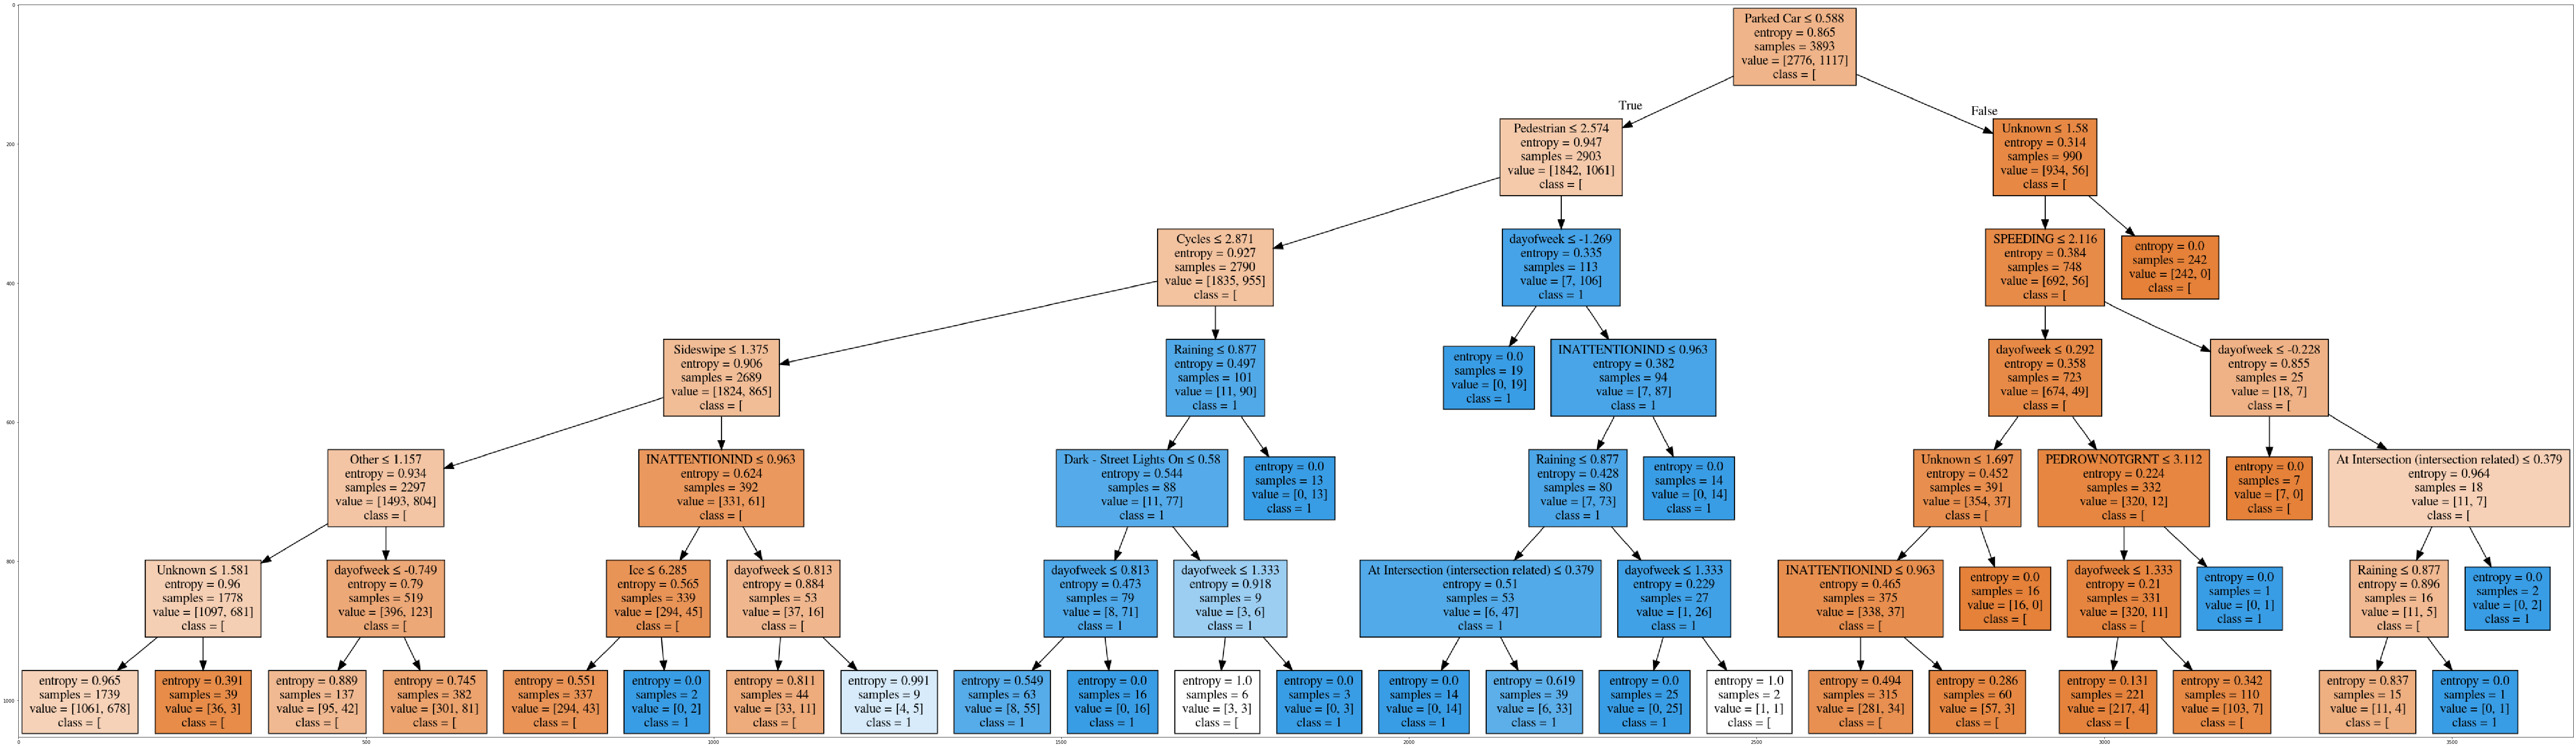

In [100]:
yhat = KNN(X_test)
kj = jaccard_similarity_score(y_test, yhat)
kf = f1_score(y_test,yhat)
yhat = decision(X_test)
dj = jaccard_similarity_score(y_test, yhat)
ddf = f1_score(y_test,yhat)

Report = {'Algorithm':['KNN','Decision Tree'],'Jaccard':[kj,dj],'F1-score':[kf,ddf]}

In [101]:
Report = pd.DataFrame(Report).set_index('Algorithm')
Report

,Jaccard,F1-score
Algorithm,,
KNN,0.771795,0.858954
Decision Tree,0.779487,0.866044


# Results
Jaccard similarity score is a measurement of the similarity or overlapping of two datasets. It range from 0% to 100% and 100% means two datasets are identical. F1 score is also an accuracy test which compare the true positive and false positive in the predict dataset. When F1-score equals 1, two datasets are identical.

KNN has Jaccard score 0.772 and F1-score 0.859. Decision tree has Jaccard score 0.779 and F1-score 0.867. Both methods do a decent job in prediction.

# Discussion
Overall, the models built have a good accuracy. Howevever, there are still some improvements we can do in the future. For example, small percentage of the data is chosen to train and predict the model which may affect the accuracy of the results. Although the accuracy of the decision tree is high, it is hard to follow the tree plotted manually. More researches may be required, so that we can drop more features to have a readable tree graph.

# Conclusion
The purpose of the project is to build models to predict car collision severity in seattle. K nearest neighbour and decision tree have a high accuracy and are built successfully.